# Nichtlineare Optimierung -- der steepest descent

__Manfred Brill, Hochschule Kaiserslautern__

## Vorbemerkungen
In der Vorlesung hatten wir als eine konkrete Realisierung eines Abstiegsverfahrens *steepest descent* formuliert und an Hand einer quadratischen Form die Iterationen visualisiert. In diesem Notebook finden wir die Berechnungen und Visualisierungen mit dem dazu gehörenden Python-Code.

Wir implementieren die quadratische Form als Zielfunktion f. Da wird die Gradienten der quadratischen Form benötigen implementieren wir auch gleich eine Funktion, die uns den Gradienten zurückgibt. Wir verwenden Konturlinien und erzeugen damit eine grafische Ausgabe der quadratischen Form. Hier erkennen wir bereits sehr gut, dass das gesuchte lokale Minimum im Ursprung liegt.

Für das Iterationsverfahren verwenden wir den Startpunkt (1/2, 1/3), den wir gleich in die grafische Darstellung eintragen.

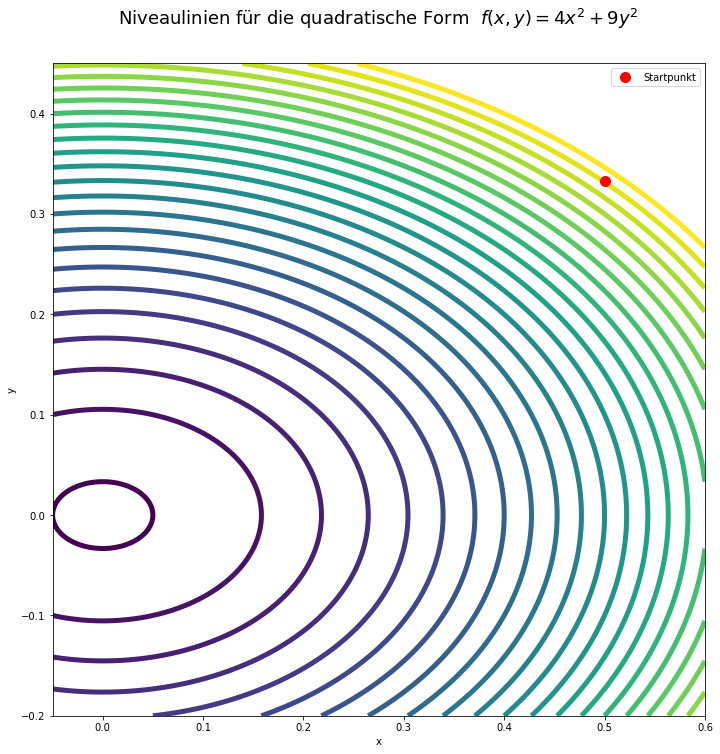

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def f(x, y):
    """ Zielfunktion """
    return 4.0*x**2 + 9.0*y**2


def gradient(x, y):
    """ Gradient der Zielfunktion """
    return 8.0*x, 18.0*y


x0 = 0.5
y0 = 1.0/3.0

xmin = -0.05
xmax = 0.6
ymin = -0.2
ymax = 0.45

x = np.linspace(xmin, xmax, 200)
y = np.linspace(ymin, ymax, 200)
x, y = np.meshgrid(x, y)
z = f(x, y)

Cmin = 0.01
Cmax = 2.1
Cstep = 0.09
levels = np.arange(Cmin, Cmax, Cstep)

fig = plt.figure(figsize=(12.0, 12.0))
ax = fig.add_subplot(111)
ax.set_aspect('equal')
cplot = plt.contour(x, y, z,
                    levels=levels,
                    linewidths=5,
                    extent=(xmin, xmax, -ymin, ymax))
plt.plot(x0, y0, 'ro', markersize=10, label='Startpunkt')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Niveaulinien für die quadratische Form  $f(x, y) = 4 x^2 +  9 y^2$',
          y=1.05, fontsize=18)
plt.legend()

## Steepest Descnt
Wir realisieren dieses Abstiegsverfahren selbst, da es als Methode in SciPy nicht angeboten wird. Das ist auch nicht schwierig. Für den Schritt der eindimensionalen Optimierung verwenden wir die Funktion *optimize_scalar* und den Brent-Algorithmus.

Wir implementieren eine Funktion, die einen Iterationsschritt von steepest descent ausführ und vorher noch die Zielfunktion, die wir in *optimize.minimize_scalar* einsetzen. Hier sieht man auch gut, wie wir mit Hilfe des Parameters *arg* weitere Parameter an die Zielfunktion übergeben können.

In [13]:
from scipy import optimize

def oned_f(t, x, y, dx, dy):
    """
    Zielfunktion für die eindimensionale Optimierung
    """
    return f(x + t*dx, y + t*dy)


def sd_iteration(x0, y0, out=True):
    """ Eine Iteration von Steepest Descent """
    d0x, d0y = gradient(x0, y0)
    d0x = -d0x
    d0y = -d0y
    result = optimize.minimize_scalar(oned_f,
                                      args=(x0, y0, d0x, d0y),
                                      bracket=(0.0, 10.0),
                                      options=({'maxiter': 50}))
    if result.success:
        t = result.x
        x1 = x0 + t*d0x
        y1 = y0 + t*d0y
    else:
        x1, y1 = 0.0, 0.0
    
    return x1, y1

Jetzt führen wir eine erste Iteration durch und geben dazu Werte auf der Konsole aus, bevor wir eine grafische Darstellung erstellen.

In [15]:
print('Steepest Descent')
print('Startpunkt:', x0, ',', y0)
print('Funktionswert am Startpunkt', f(x0, y0))
print('Exaktes lokales Minimum ist der Punkt (0,0)')
print('Funktionswert am lokalen Minimum:', f(0.0, 0.0))

# Erste Iteration
print('\nErste Iteration')
x1, y1 = sd_iteration(x0, y0)
print('Das Ergebnis der ersten Iteration:', x1, ',', y1)
print('Funktionswert an diesem Punkt:', f(x1, y1))

Steepest Descent
Startpunkt: 0.5 , 0.3333333333333333
Funktionswert am Startpunkt 2.0
Exaktes lokales Minimum ist der Punkt (0,0)
Funktionswert am lokalen Minimum: 0.0

Erste Iteration
Das Ergebnis der ersten Iteration: 0.23195876288659678 , -0.06872852233677151
Funktionswert an diesem Punkt: 0.2577319587628866
